# import tensorflow 

In [1]:
import tensorflow as tf
import numpy as np

# get the data


In [2]:
# if there is no "MNIST_data/" then download 
from tensorflow.examples.tutorials.mnist import input_data
# extract and read the mnist data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# set variables

In [3]:
nb_class = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32,[None,784])
# 0-9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32,[None, nb_class])

W = tf.Variable(tf.random_normal([784,nb_class]))
b = tf.Variable(tf.random_normal([nb_class]))  


# softmax for the linear regression

In [4]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis),axis = 1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1).minimize(cost)

# test model   
# now the argmax <== arg_max, get the index of max value
is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.argmax(Y,1))
# Caculate accruracy
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))


# training epoch/batch

Epoch: 0001 cost= 2.672227400
Epoch: 0002 cost= 1.073593106
Epoch: 0003 cost= 0.851961366
Epoch: 0004 cost= 0.743894721
Epoch: 0005 cost= 0.675093191
Epoch: 0006 cost= 0.627537878
Epoch: 0007 cost= 0.591659550
Epoch: 0008 cost= 0.562569443
Epoch: 0009 cost= 0.539346324
Epoch: 0010 cost= 0.519420071
Epoch: 0011 cost= 0.503253684
Epoch: 0012 cost= 0.488176104
Epoch: 0013 cost= 0.475019434
Epoch: 0014 cost= 0.464625835
Epoch: 0015 cost= 0.454626297
Learning finished
old_Accuracy:  0.8919
new_Accuracy: 0.8919
Label: [5]
Prediction: [3]


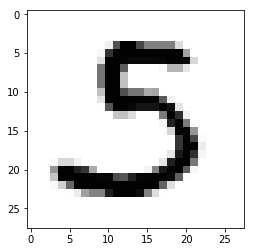

In [5]:
# parameters
training_epoches = 15
batch_size = 100

with tf.Session() as sess:
    # initialize Tensorflow Variables
    sess.run(tf.global_variables_initializer())
    # training cycles
    for epoch in range(training_epoches):
        avg_cast = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            c,_ = sess.run([cost,optimizer]
                           ,feed_dict={X:batch_xs,Y:batch_ys})
            avg_cast += c / total_batch
            
        print("Epoch:",'%04d'%(epoch+1)
              ,'cost=','{:.9f}'.format(avg_cast))
    
    print("Learning finished")

    # Test the model using test sets
    print("old_Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
    print('new_Accuracy:',sess.run(accuracy,feed_dict={
        X: mnist.test.images, Y: mnist.test.labels}))
    
    # Sample image show and prediction
    import matplotlib.pyplot as plt
    import random


    # Get one and predict
    r = random.randint(0,mnist.test.num_examples -1 )
    print("Label:",sess.run(tf.arg_max(mnist.test.labels[r:r+1],1)))
    print("Prediction:",sess.run(tf.arg_max(hypothesis,1),
          feed_dict={X:mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
               cmap='Greys',interpolation='nearest')
    plt.show()


 